**CodSoft DataScience Intership: Task 4**

Task 4: Sales Prediction Using Python

*   Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
*   In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

Dataset: https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [4]:
import pandas as pd

In [5]:
df= pd.read_csv("advertising.csv")

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#Data Exploration
Exploring the data to understand the variables and their distribution.

In [7]:
df.shape

(200, 4)

In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [10]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

The above code provides inforamation about the datatypes of each columns.

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The above code providing the describtion of each columns.

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


The above code provide the correlation of each column.

In [14]:
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

It shows that there is no missing values present in the dataset.

#Data Visualization

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lets visualize the correlation of each column through graph.

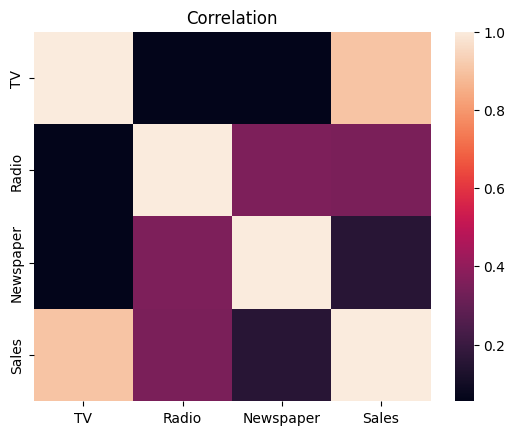

In [17]:
sns.heatmap(df.corr())
plt.title("Correlation")
plt.show()

Lets Visualize the relationship using scatterplot.

Text(0.5, 1.0, 'TV v/s Sales')

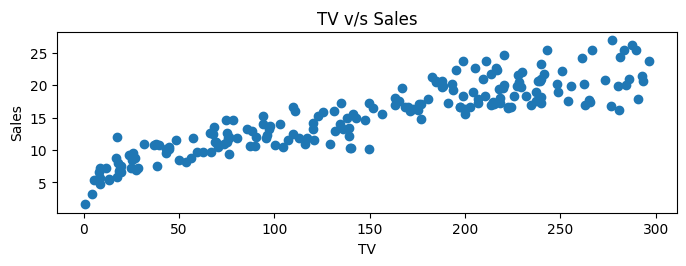

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.scatter(df['TV'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV v/s Sales")


Text(0.5, 1.0, 'Radio v/s Sales')

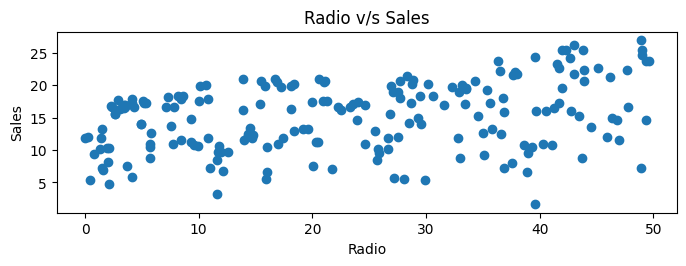

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,2)
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio v/s Sales")

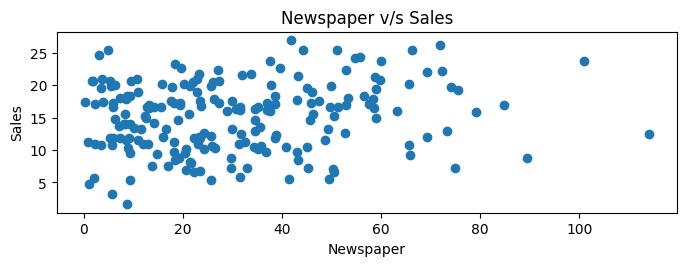

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,3)
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper v/s Sales")
plt.show()

By observing the plots, the relation between Sales and TV is more linear than other.

#Model Preparation

Split The data into feature and target variable.

In [33]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [34]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training

In [40]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
train_score=model.score(X_train,y_train)
test_score= model.score(X_test,y_test)
print(f"Training Score: {train_score}, Testing Score: {test_score}")

Training Score: 0.9001416005862131, Testing Score: 0.9059011844150826


In [43]:
y_pred=model.predict(X_test)

In [46]:
d=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d.head()

,Actual,Predicted
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719


Text(0.5, 1.0, 'Actual v/s Predicted')

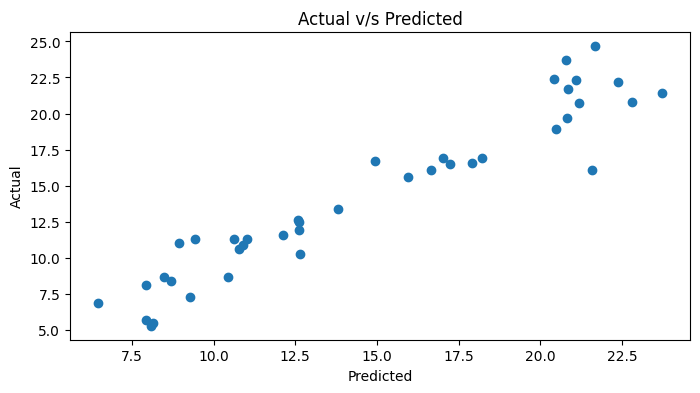

In [47]:
plt.subplots(figsize=(8,4))
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual v/s Predicted')

#Model Evaluation

In [49]:
print("R2: ",r2_score(y_pred,y_test))

R2:  0.8960265274962571


In [51]:
print("Mean Absolute Error:", mean_absolute_error(y_pred, y_test))

Mean Absolute Error: 1.2748262109549338


In [52]:
print("Mean Squared Error:", mean_squared_error(y_pred, y_test))

Mean Squared Error: 2.9077569102710896
